**IMPORT DATA AND PACKAGES**
In this section i will import the library packages that I need to use for the project.
1. Numpy ~ for scientific computing in python. It provides a high-performance multidimensional array object and tools for working with these arrays.
2. Pandas ~ for data structures and data analysis in python. It provides a high-performance multidimensional array object.
3. Matplotlib ~ for creating static, animated, and interactive visualizations.

The dataset that was provided was already slip into training and testing data. In order to run the datasets for the program I will read both files separately using pandas.

In [376]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
Train_df = pd.read_csv('train.csv')
Test_df = pd.read_csv('test.csv')

**OVERVIEW OF TRAINING DATA**

In [377]:
Train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [378]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The training dataset had 12 variable columns in total with 891 rows (or entries) representing individual passengers. 

The data shows passenger name, survival, Pclass, sex, if they were traveling with parents or siblings, ticket number, price they paid for fare, cabin, and where they embarked from. 

The dataset is mixed (with strings, floats and integers).

**DATA QUALITY CHECK (TRAINING DATA)**

As we want to do some machine learning and visualizations in this project, I checked for the quality of data because machine learning algorithms do not support data with missing values.

In [379]:
Train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Note: The training dataset has 177 missing age values, 687 cabin values and 2 embarked values.

**OVERVIEW OF TESTING DATA**

As I will use 2 different datasets for my project, I though it would also be important to get an overview of the testing dataset.

In [380]:
Test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [381]:
Test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


The testing dataset has 11 variable columns in total and 418 rows (or unique entries).

The data provided excludes the survival column. This is because the test dataset is going to be used to predict whether or not a passenger survived. 

The dataset also has strings, floats and integers.

**DATA QUALITY CHECK (TESTING DATA)**

I will also check the quality of the testing dataset as the original data was already slip into 2 sets of data. 

This processes is important because its a different dataset and a generalized assumption can lead to bias in our model.

In [382]:
Test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Note: the testing dataset has 86 missing age values, 1 missing fare value 327 missing cabin values.

**VISUALIZING MISSING VALUES** 

In this stage, I am going to visualize the missing values against the total number of values in our dataset in order for us to get a clear picture of the percentage of whats missing and make positive decisions on what we will do with the data.
From the datasets provided, the missing values are in the following columns:
1. Age
2. Fare
3. Cabin 
4. Embarked

Text(0, 0.5, 'values')

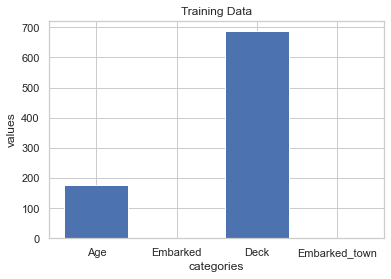

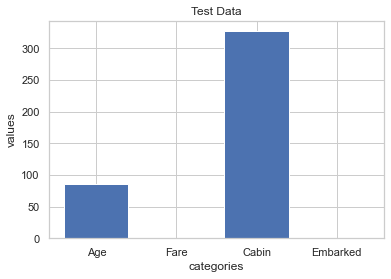

In [383]:
#visualizing missing values from Training Data
missing_age = Train_df.isnull().sum()['Age']
missing_embarked = Train_df.isnull().sum()['Embarked']
missing_deck = Train_df.isnull().sum()['Cabin']
#missing_embark_town = Train_df.isnull().sum()['embark_town']

Y1 = [missing_age, missing_embarked, missing_deck, missing_embark_town]
X1 = ['Age', 'Embarked', 'Deck', 'Embarked_town']
fig, ax = plt.subplots()
ax.bar(X1, Y1)

# Add title and axis names
plt.title('Training Data')
plt.xlabel('categories')
plt.ylabel('values')
 
# Create names on the x axis
#plt.xticks(x_pos, bars)
 
#visualizing missing values from Testing dataset

missingAge = Test_df.isnull().sum()['Age'] 
missingFare = Test_df.isnull().sum()['Fare']
missingCabin = Test_df.isnull().sum()['Cabin']
missingEmbarked = Test_df.isnull().sum()['Embarked']

Y = [missingAge, missingFare, missingCabin, missingEmbarked]
X = ['Age', 'Fare', 'Cabin','Embarked']
fig, ax = plt.subplots()
ax.bar(X,Y)

# Add title and axis names
plt.title('Test Data')
plt.xlabel('categories')
plt.ylabel('values')

**Calculating percentage of missing data**

From the simple visualization, you can see that age, deck and cabin are the variables with the most missing data. I would also like to believe that deck and cabin probably mean the same but just that different terminology was used. 

Now I want to give a graphical visualization of the percentage of missing data.

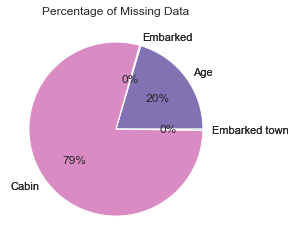

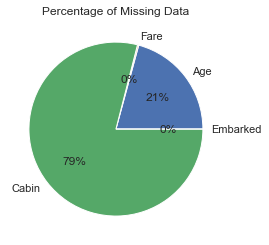

In [384]:
Y1 = [missing_age, missing_embarked, missing_deck, missing_embark_town]
labels = ['Age', 'Embarked', 'Cabin', 'Embarked town']

fig, ax = plt.subplots()
ax.pie(Y1, labels = labels, autopct = '%.0f%%')
plt.pie(Y1, labels=labels)
ax.set_title('Percentage of Missing Data')
plt.show() 

Y = [missingAge, missingFare, missingCabin, missingEmbarked]
labels = ['Age', 'Fare', 'Cabin','Embarked']

fig, ax = plt.subplots()
ax.pie(Y, labels = labels, autopct = '%.0f%%')
ax.set_title ('Percentage of Missing Data')
plt.show() 

In [385]:
# percent of missing "Age" 
print('Training Data: Percent of missing "Age" records is %.2f%%' %((Train_df['Age'].isnull().sum()/Train_df.shape[0])*100))

print('Testing Data: Percent of missing "Age" records is %.2f%%' %((Test_df['Age'].isnull().sum()/Test_df.shape[0])*100))

#percentage of missing "Embarked"
print('Training Data: Percent of missing "Embarked" records is %.2f%%' %((Train_df['Embarked'].isnull().sum()/Train_df.shape[0])*100))


Training Data: Percent of missing "Age" records is 19.87%
Testing Data: Percent of missing "Age" records is 20.57%
Training Data: Percent of missing "Embarked" records is 0.22%


From what we see from the data, the percentage of missing values in the column Cabin is too large to bias the results of the machine learning models and/or reduce the accuracy of the model. Hence i have decided to exclude/drop the column.

Missing data on age is a small proportion of the whole dataset, and as such i will impute the data by using the mean age to fill up the missing data

Missing values on embarked are a few and I will use the mode to impute the missing data

**Calculating Mean, Median and Mode**

In [386]:
#Import the statistics module
import statistics

print("The mean of 'Age' of Training Data is:")
statistics.mean(Train_df['Age'].dropna().to_list())


The mean of 'Age' of Training Data is:


29.699117647058824

In [387]:
print("The mean of 'Age' of Testing Data is:")
statistics.mean(Test_df['Age'].dropna().to_list())

The mean of 'Age' of Testing Data is:


30.272590361445783

In [388]:
print("The median of 'Age' of Training Data is:")
statistics.median(Train_df['Age'].dropna().to_list())

The median of 'Age' of Training Data is:


28.0

In [389]:
print("The median of 'Age' of Testing Data is:")
statistics.median(Test_df['Age'].dropna().to_list())

The median of 'Age' of Testing Data is:


27.0

Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


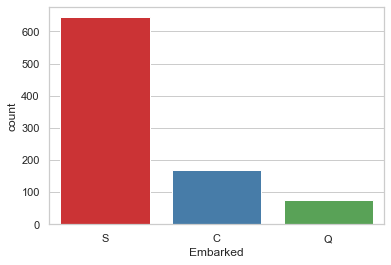

In [390]:
#Import the seaborn module
import seaborn as sns

print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(Train_df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=Train_df, palette='Set1')
sns.set_theme(style="whitegrid")
plt.show()

In [391]:
#Calculate the most common port of embarkation is the dataset
print('The most common port of embarkation is:')
statistics.mode(Test_df['Embarked'].dropna().to_list())

The most common port of embarkation is:


'S'

**Imputing missed values**

In [392]:
Train_data = Train_df.copy()
Train_data["Age"].fillna(Train_df["Age"].median(skipna=True), inplace=True)
Train_data["Embarked"].fillna(Train_df['Embarked'].value_counts().idxmax(), inplace=True)
Train_data.drop('Cabin', axis=1, inplace=True)
Train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [393]:
Test_data = Test_df.copy()
Test_data["Age"].fillna(Test_df["Age"].median(skipna=True), inplace=True)
Test_data["Embarked"].fillna(Test_df['Embarked'].value_counts().idxmax(), inplace=True)
Test_data.drop('Cabin', axis=1, inplace=True)
Test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [394]:
Train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [395]:
Test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


**Visualizing the number of people who survived grouped by gender**

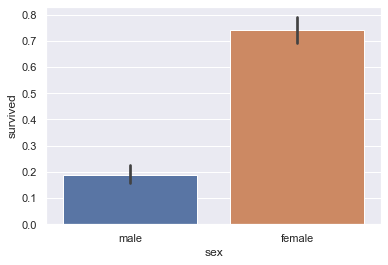

In [398]:
import seaborn as sns
sns.set_style('darkgrid')

Train_data = sns.load_dataset('Train_')

# Construct plot
sns.barplot(x = "sex", y = "survived", data = Train_df)
plt.show()


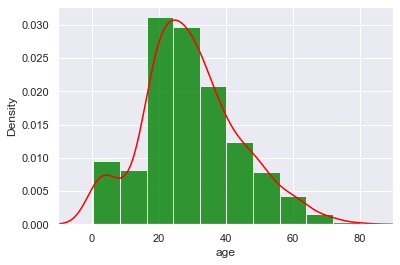

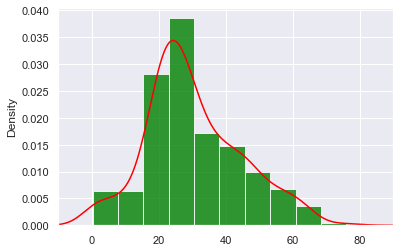

In [ ]:
ax = Train_df["age"].hist(bins=10, density=True, stacked=True, color='green', alpha=0.8)
Train_df["age"].plot(kind='density',color='red')
ax.set(xlabel='age')
plt.xlim(-10,90)
plt.show()

ax1 = Test_df["Age"].hist(bins=10, density=True, stacked=True, color='green', alpha=0.8)
Test_df["Age"].plot(kind='density', color='red')
ax.set(xlabel='Age')
plt.xlim(-10,90)
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
ax = Train_df["Age"].hist(bins=15, density=True, stacked=True, color='red', alpha=0.6)
Train_df["Age"].plot(kind='density', color='black')
ax = Train_data["Age"].hist(bins=15, density=True, stacked=True, color='blue', alpha=0.5)
Train_data["Age"].plot(kind='density', color='yellow')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

KeyError: 'Age'

<Figure size 1080x576 with 0 Axes>